In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
print(df['Seller_Type'].unique())

['Dealer' 'Individual']


In [6]:
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Manual' 'Automatic']
[0 1 3]


In [7]:
#Missing Values

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
final_dataset= df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
final_dataset['Curreny_Year']=2020

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Curreny_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [15]:
final_dataset['no_of_years']=final_dataset['Curreny_Year']-final_dataset['Year']

In [16]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Curreny_Year,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [17]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Curreny_Year,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [19]:
final_dataset.drop(['Curreny_Year'],axis=1,inplace=True)

In [20]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [21]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [22]:
final_dataset.corr()['Selling_Price'].sort_values(ascending=False)

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Kms_Driven                0.029187
Owner                    -0.088344
no_of_years              -0.236141
Transmission_Manual      -0.367128
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

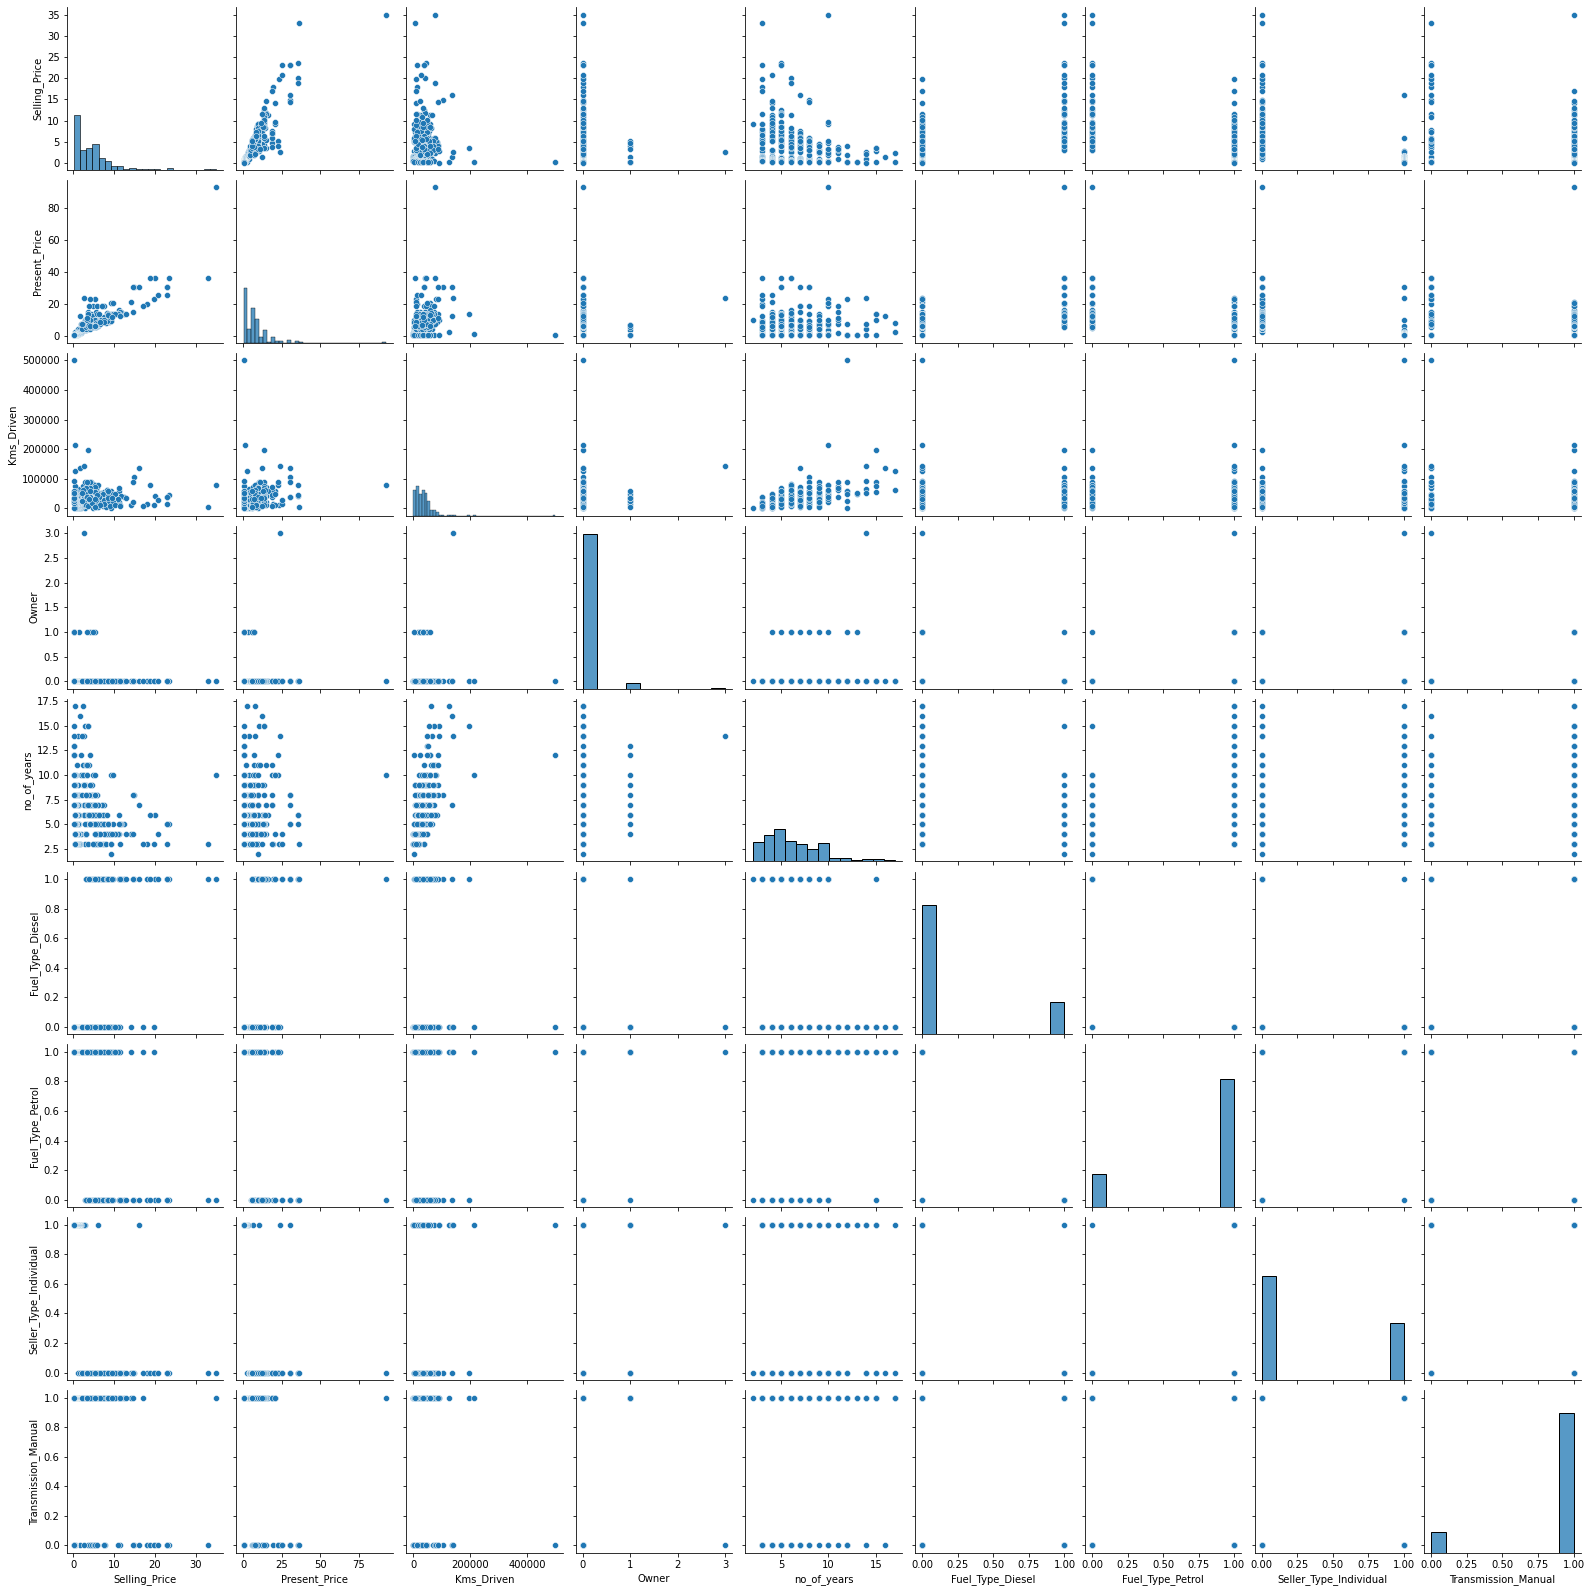

In [23]:
 sns.pairplot(final_dataset)

<AxesSubplot:>

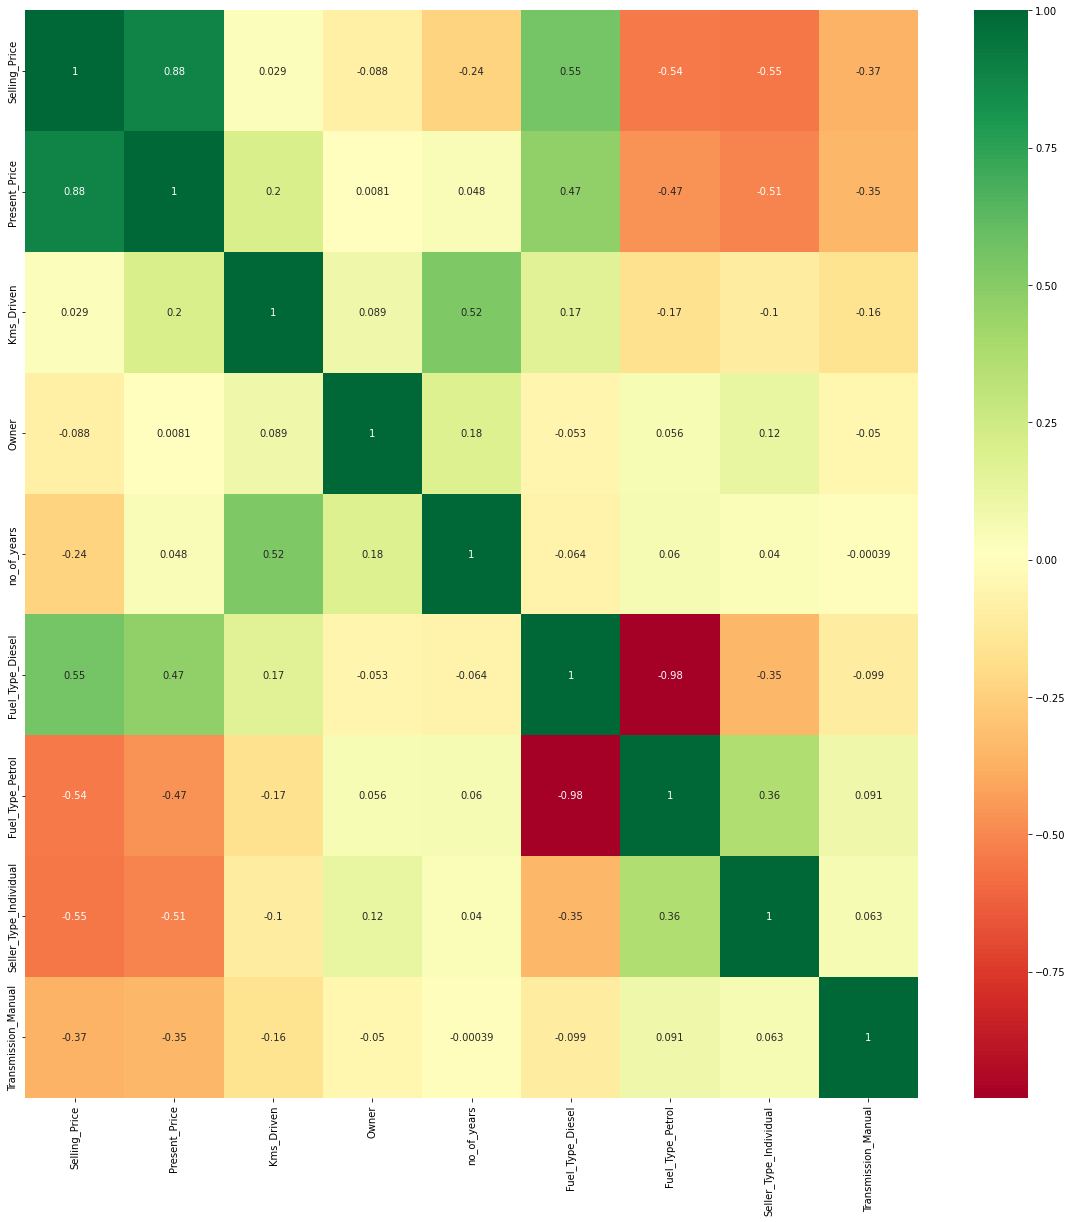

In [24]:
corrmat=final_dataset.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [25]:
X=final_dataset.drop('Selling_Price',axis=1)
y=final_dataset['Selling_Price']

In [26]:
X.head()

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [27]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
model_prelim= ExtraTreesRegressor()
model_prelim.fit(X,y)

ExtraTreesRegressor()

In [29]:
print(model_prelim.feature_importances_)

[0.3700976  0.04079625 0.00045195 0.07246812 0.22711814 0.02033945
 0.11658224 0.15214625]


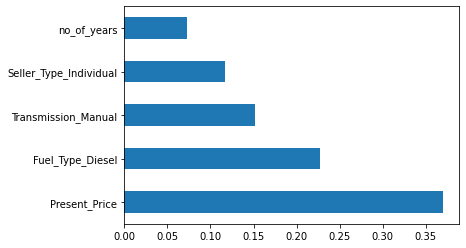

In [30]:
feat_imp= pd.Series(model_prelim.feature_importances_,index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [31]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [32]:
X_train.shape

(240, 8)

In [33]:
rf=RandomForestRegressor()

In [34]:
# HyperParametres Tuning
n_estimators= [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features= ['auto','sqrt']
max_depth= [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf= [1,2,5,10]

In [35]:
random_grid= {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
                'min_samples_split':min_samples_split,
                 'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
rf_random= RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [37]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
predictions= rf_random.predict(X_test)

In [39]:
predictions

array([0.46462, 5.9972 , 7.60956, 7.8409 , 0.41949, 5.60526, 5.60665,
       7.39348, 0.54071, 8.14647, 5.27501, 0.93437, 0.58296, 3.63052,
       7.36007, 4.10134, 5.20517, 0.57467, 3.53828, 8.95721, 4.8768 ,
       2.7732 , 6.71399, 8.11261, 0.55027, 5.79399, 0.49799, 4.06628,
       5.6053 , 4.60626, 2.94405, 8.65871, 0.65117, 8.97587, 4.6055 ,
       0.57461, 3.35104, 0.39143, 6.26677, 2.74358, 0.85106, 5.12151,
       6.78547, 7.12551, 0.62315, 4.52265, 0.6569 , 8.23487, 5.25588,
       9.99025, 4.9355 , 1.14249, 8.74339, 0.47388, 5.6596 , 4.3502 ,
       0.59484, 0.68379, 7.52209, 8.39715, 0.41028])

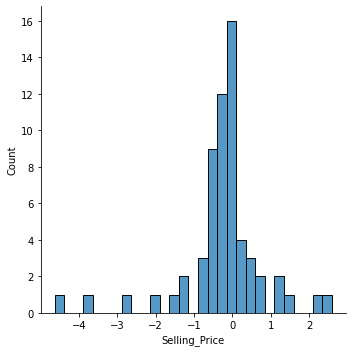

In [40]:
sns.displot(y_test-predictions)

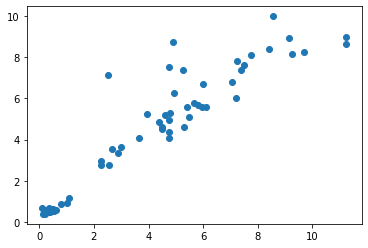

In [41]:
plt.scatter(y_test,predictions)

In [42]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [43]:
rf_random.best_score_

-4.23465579151547

In [52]:
import joblib

joblib.dump(rf_random,'final_model.pkl')

['final_model.pkl']

In [53]:
joblib.dump(list(X.columns),'column_names.pkl')

['column_names.pkl']

In [56]:
loaded_model = joblib.load('final_model.pkl')

In [54]:
col_names = joblib.load('column_names.pkl')

In [55]:
col_names

['Present_Price',
 'Kms_Driven',
 'Owner',
 'no_of_years',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Seller_Type_Individual',
 'Transmission_Manual']

In [58]:
loaded_model.predict([[5.59,27000,0,6,0,1,0,1]])

C:\Users\venka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.71395])

In [57]:
X.head()

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [59]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64